In [1]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from fastcluster import linkage
import seaborn as sns
import scipy.cluster.hierarchy as sch
from matplotlib import cm
import plotly.figure_factory as ff
from scipy.spatial import ConvexHull
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import glob
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
import glob

# set paths to folders containing CSV files
path = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/"

# combine data_po files into df1
files_po = glob.glob(path + "*data_po*.csv")
df1 = pd.DataFrame()
for file in files_po:
    with open(file, 'r') as f:
        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df1 = pd.concat([df1, temp_df], axis=0)

# rename the columns in df1 and convert to float
df1.columns = [i for i in range(df1.shape[1])]
df1 = df1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

# combine data_pdmp files into df2
files_pdmp = glob.glob(path + "*data_pdmp*.csv")
df2 = pd.DataFrame()
for file in files_pdmp:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df2 = pd.concat([df2, temp_df], axis=0)

# rename the columns in df2 and convert to float
df2.columns = [i for i in range(df2.shape[1])]
df2 = df2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

# combine data_pin files into df3
files_pin = glob.glob(path + "*data_pin*.csv")
df3 = pd.DataFrame()
for file in files_pin:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df3 = pd.concat([df3, temp_df], axis=0)

# rename the columns in df3 and convert to float
df3.columns = [i for i in range(df3.shape[1])]
df3 = df3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)


In [3]:
# # set paths to folders containing CSV files
# path1 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_po1.csv"
# path2 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pdmp1.csv"
# path3 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pin1.csv"

# all_files = [path1, path2, path3]
# dfs = []

# for filename in all_files:
#     with open(filename, 'r') as f:
#         csv_string = f.read()

#     data = csv_string
#     df = pd.DataFrame([x.split(',') for x in data.split('\n')])
#     df.drop(df.tail(1).index,inplace=True)
#     dfs.append(df)

# df_combined1, df_combined2, df_combined3 = dfs[0], dfs[1], dfs[2]

# # process dataframe 1
# df1 = df_combined1.rename(columns={0: 'Fault'})
# df1 = df1.astype(float)

# mincol1 = df1.count(axis=1)
# min_elements1 = mincol1.min()
# df1 = df1.iloc[:, :min_elements1]

# # process dataframe 2
# df2 = df_combined2.rename(columns={0: 'Fault'})
# df2 = df2.astype(float)

# mincol2 = df2.count(axis=1)
# min_elements2 = mincol2.min()
# df2 = df2.iloc[:, :min_elements2]

# # process dataframe 3
# df3 = df_combined3.rename(columns={0: 'Fault'})
# df3 = df3.astype(float)

# mincol3 = df3.count(axis=1)
# min_elements3 = mincol3.min()
# df3 = df3.iloc[:, :min_elements3]

In [4]:
# Assign Fault label to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [5]:
# del fault label column 

df1.columns = df1.columns.astype(str)
del df1[df1.columns[0]]

df2.columns = df2.columns.astype(str)
del df2[df2.columns[0]]

df3.columns = df3.columns.astype(str)
del df3[df3.columns[0]]

In [6]:
# Perform PCA on the data

pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(df1)

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(df2)

pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(df3)

In [7]:
# Create a DataFrame df_pca with the principal components and cluster labels

df_pca1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'], index=df1.index)

df_pca2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'], index=df2.index)

df_pca3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'], index=df3.index)

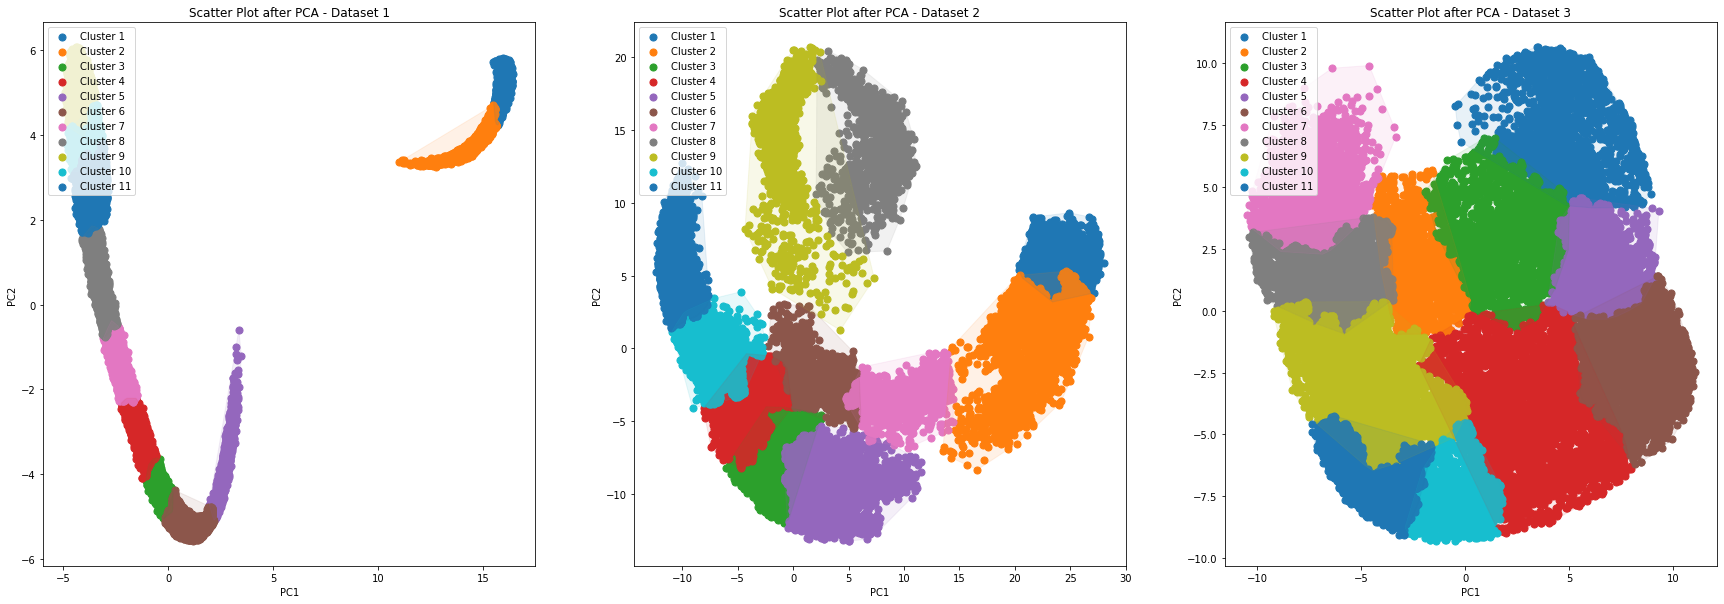

In [8]:
def plot_clusters(df_list, num_clusters=11):
    # Create a list of unique colors for each cluster
    colors = sns.color_palette('tab10', num_clusters)

    fig, axs = plt.subplots(1, len(df_list), figsize=(10*len(df_list), 10))

    # Create a separate scatter plot for each dataframe
    for j, df in enumerate(df_list):
        linkage_matrix = linkage(df[['PC1', 'PC2']], method='ward')
        cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        df['cluster'] = cluster_labels
        for i in range(num_clusters):
            axs[j].scatter(df.loc[df['cluster']==i+1, 'PC1'], df.loc[df['cluster']==i+1, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
        axs[j].set_title(f'Scatter Plot after PCA - Dataset {j+1}')
        axs[j].set_xlabel('PC1')
        axs[j].set_ylabel('PC2')
        axs[j].legend(loc='upper left')

        # Draw convex hulls
        for i in range(np.unique(cluster_labels).shape[0]):
            cluster_points = df.loc[cluster_labels==i+1, ['PC1', 'PC2']]
            hull = ConvexHull(cluster_points)
            axs[j].fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

    plt.show()


# Example usage with three dataframes df1, df2, df3:
plot_clusters([df_pca1, df_pca2, df_pca3], num_clusters=11)


In [9]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true1, df_pca1["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster    1     2    3    4    5     6    7    8     9    10   11
Fault                                                             
1.0         0     0  379  315  164   636  234  295   624  157  219
2.0      1965  1527    0    0    0     0    0    0     0    0    0
3.0         0     0  223  331    7   262  350  332   959  317  289
4.0         0     0  197  190  575   882  245  309   353  121  229
5.0         0     0  391  376   94   526  220  170   952  166  179
6.0         0     0   50   87    0    11  178  342  1171  327  892
7.0         0     0  346  271  499  1014  214  406    40  187  177
8.0         0     0  262  397  429   791  263  289   349  171  168
9.0         0     0  335  246  159   629  220  293   888  103  184
10.0        0     0  199  199  288   616  217  319   371  183  299
11.0        0     0  312  206  267   875  192  274   681  213  186


In [10]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true2, df_pca2["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster    1     2    3    4    5    6    7     8     9    10    11
Fault                                                              
1.0         0     0  475  636  617    0    0     0     0  736   559
2.0         0     0    0    0    0    6    0  1261  2225    0     0
3.0         0     0  325  529  817    2    2     0     0  742   653
4.0        26  1354    6  479    0  654  191     0     0  391     0
5.0         0     0  473  806  534    0    0     0     0  714   547
6.0      1391  1667    0    0    0    0    0     0     0    0     0
7.0         0     0  274  494  505    0    0     0     0  742  1139
8.0         0     0  331  387  803    4   14     0     0  471  1109
9.0         0     0   93  390    3  567  839     0     0  740   425
10.0        0     0  302  645  555    0    0     0     0  663   526
11.0        0     0  343  692  588    0    0     0     0  865   718


In [11]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true3, df_pca3["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster    1    2    3    4    5    6    7    8    9    10   11
Fault                                                          
1.0        45  103  192  386  247  395  417  341  398  156  343
2.0      1658  301  539    0   28    0  757  209    0    0    0
3.0         7   91  128  445  472  304  198  440  645  110  230
4.0       237  153  281  312  120  445  277  520  344  143  269
5.0        28  116  158  382  254  462  398  293  375  194  414
6.0        21   22   15  644  279  617  153  156  724  147  280
7.0       436  197  349  234  176  497  173  513  356   77  146
8.0       322  188  345  302  391  512  101  424  266  108  160
9.0        94  127  224  402  284  397  474  237  471  120  227
10.0      191   86  182  320  103  529  301  285  279  164  251
11.0      311  214  432  298  457  208  373  284  620    9    0
